## Secant Method
- Implement the <b>Secant method</b> as a function and solve the following equation:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.
- Compare the results with the one from Newton's method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

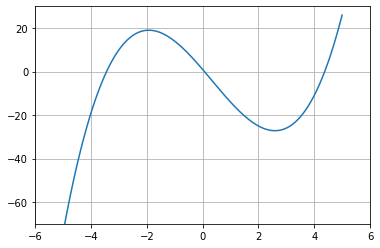

In [2]:
x = np.linspace(-5, 5, 1000)
f = lambda x : x**3 - x**2 -15 * x +1 
df = lambda x : 3*x**2 - 2*x - 15
plt.plot(x, f(x))
plt.xlim(-6., 6)
plt.ylim(-70, 30)
plt.grid()
plt.show()

In [3]:
5.5 - 1/f(5.5)-f(4.5) * f(5.5)

-233.50268163615561

In [4]:
def secant_method (f, x_0 ,x_1, tol=1e-8, max_iter=100):
    x = x_1
    xl =[x_0,x_1]
    i = 0
    while i < max_iter: 
        x = x - (f(x)*(x - xl[-2]))/(f(x) - f(xl[-2]))
        xl.append(x)
        if abs(xl[-1] - xl[-2]) < tol:
            break
        i += 1
    return xl, xl[-1]

#----------------------------------------------------------------------------------------------------------------------
def newton(f, df, x0, max_iter=100, tol=1e-8):
    x = x0  
    r = [x]
    for i in range(max_iter):
        x = x - f(x) / df(x)
        r.append(x)
        if np.abs(r[-1]-r[-2])<tol:
            break
    return r, r[-1]
    
    

In [5]:
# Secant with initial xk-1 = 5.5, epsilon = 1e-5
r_all,rfinal = secant_method (f, 5.5,4.5, tol=1e-5)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r = {rfinal}')
print(f'f(r) = {f(rfinal)}')

Found solution after 5 iterations.
r = 4.375753855672038
f(r) = 3.097966327914037e-12


In [6]:
# Newton's with epsilon = 1e-5
r_all,rfinal = newton(f,df, 4.5, tol=1e-5)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {f(rfinal)}')

Found solution after 2 iterations.
r1 = 4.375753855705814
f(r1) = 1.1410321576477145e-09


In [7]:
# Secant with initial xk-1 = 4.51, epsilon = 1e-5
r_all,rfinal = secant_method (f, 4.51,4.5, tol=1e-5)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r = {rfinal}')
print(f'f(r) = {f(rfinal)}')

Found solution after 4 iterations.
r = 4.3757538557143265
f(r) = 1.427807205800491e-09


In [8]:
# Secant with initial xk-1 = 0, epsilon = 1e-5
r_all,rfinal = secant_method (f, 0,4.5, tol=1e-5)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r = {rfinal}')
print(f'f(r) = {f(rfinal)}')

Found solution after 9 iterations.
r = -3.442146169027386
f(r) = 2.4819890143135126e-08


## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

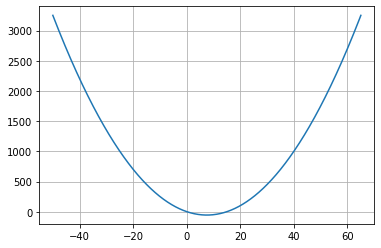

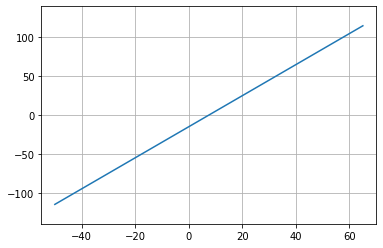

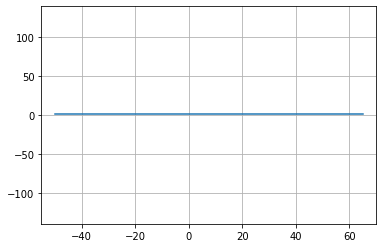

In [9]:
f = lambda x : x**2 - 15*x + 1 
df = lambda x : 2*x - 15
ddf = lambda x : 2

x = np.linspace(-50, 65, 1000)

plt.plot(x, f(x))
plt.xlim(-55., 70)
plt.ylim(-200, 3400)
plt.grid()
plt.show()
##########################
plt.plot(x, df(x))
plt.xlim(-55., 70)
plt.ylim(-140, 140)
plt.grid()
plt.show()
##########################
plt.plot(x, [2 for i in range(len(x))])
plt.xlim(-55., 70)
plt.ylim(-140, 140)
plt.grid()
plt.show()

In [10]:
def gd(df, x0,lr =0.01, max_iter=500, epsilon=0.1):
    x = x0  
    r = [x]
    for i in range(max_iter):
        x = x - lr *df(x)
        r.append(x)
        if np.abs(df(x))<epsilon:
            break
    return r, r[-1]

In [11]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
r_all,rfinal = gd (df, 40,0.01, epsilon=0.1)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r = {rfinal}')
print(f'df(r) = {df(rfinal)}')

Found solution after 320 iterations.
r = 7.549596800192111
df(r) = 0.09919360038422198


In [12]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
def newtonlr(f, df, x0,lr = 1, max_iter=100, epsilon=0.1):
    x = x0  
    r = [x]
    for i in range(max_iter):
        x = x -lr *(f(x) / df(x))
        r.append(x)
        if f(x)<epsilon:
            break
    return r, r[-1]

r_all,rfinal = newtonlr(df,ddf, 40, epsilon=0.1)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df(rfinal)}')

Found solution after 0 iterations.
r1 = 7.5
f(r1) = 0.0


In [13]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
r_all,rfinal = newtonlr(df,ddf, 40,lr=0.8, epsilon=0.1)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df(rfinal)}')

Found solution after 4 iterations.
r1 = 7.5104
f(r1) = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.

In [14]:
from sympy import *
from sympy.plotting import plot3d

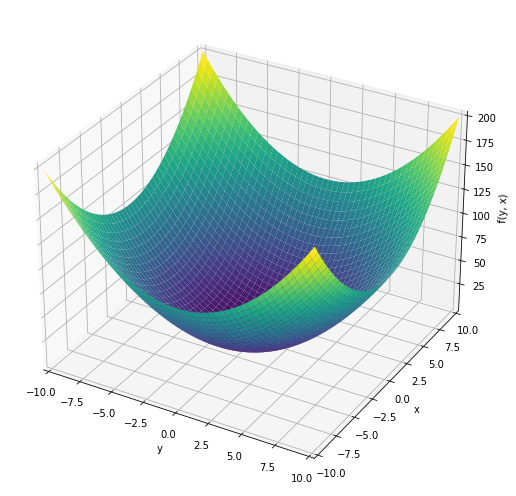

In [15]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))

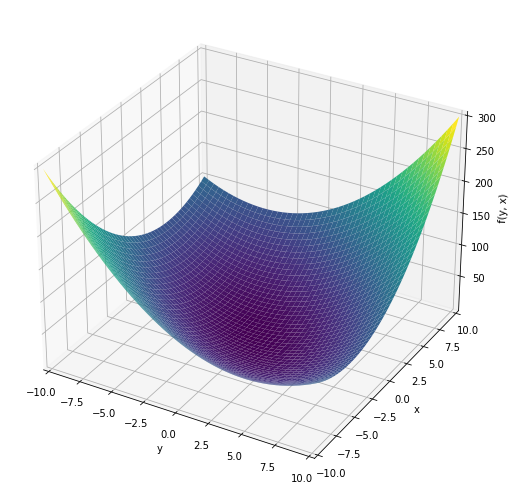

In [16]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))

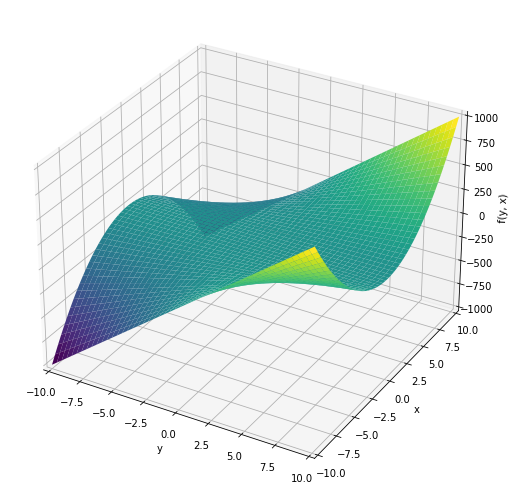

In [17]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))

In [18]:
f1 =lambda x, y : x**2 + y**2
f2 =lambda x, y : x**2 + x * y + y**2
f3 =lambda x, y : x**2 * y

df1 = lambda x, y : np.array([2*x , 2*y])
df2 = lambda x, y : np.array([2*x + y , 2*y + x])
df3 = lambda x, y : np.array([2*x*y , x**2])

ddf1 = lambda x, y : np.array([[2 , 0],[0 , 2]])
ddf2 = lambda x, y : np.array([[2 ,1],[1 , 2]])
ddf3 = lambda x, y : np.array([[2*y , 2*x],[2*x, 0]])


In [19]:
def gd_multi(df, x,y,lr =0.01, max_iter=500, epsilon=0.1):
    point = np.array([x,y])
    r = [point]
    for i in range(max_iter):
        point = point - lr *df(point[0],point[1])
        r.append(point)
        if np.abs(np.linalg.norm(df(point[0],point[1])))<epsilon:
            break
    return r, r[-1]
###############################################################################     
def newtonlr_multi(df, ddf, x0,y0,lr = 1, max_iter=100, epsilon=0.1):
    point = np.array([x0,y0])
    r = [point]
    for i in range(max_iter):
        point = point -lr *(np.linalg.inv( ddf(point[0],point[1]))@df(point[0],point[1]))
        r.append(point)
        if np.linalg.norm(df(point[0],point[1]))<epsilon:
            break
    return r, r[-1]


In [20]:
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
r_all,rfinal = gd_multi (df1, 10,10, lr=0.1, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')

Found solution after 46 iterations.
r1 = [0.00034845 0.00034845]
f(r1) = [0.0006969 0.0006969]


In [21]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001

r_all,rfinal = newtonlr_multi(df1, ddf1, 10,10,lr = 1, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')

Found solution after 1 iterations.
r1 = [0. 0.]
f(r1) = [0. 0.]


In [22]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
r_all,rfinal = newtonlr_multi(df1, ddf1, 10,10,lr = 0.5, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')

Found solution after 15 iterations.
r1 = [0.00030518 0.00030518]
f(r1) = [0.00061035 0.00061035]


In [23]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001

r_all,rfinal = newtonlr_multi(df2, ddf2, 10,10,lr = 0.5, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df2(rfinal[0],rfinal[1])}')

Found solution after 16 iterations.
r1 = [0.00015259 0.00015259]
f(r1) = [0.00045776 0.00045776]


In [24]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
r_all,rfinal = newtonlr_multi(df2, ddf2, 10,10,lr = 1, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df2(rfinal[0],rfinal[1])}')

Found solution after 1 iterations.
r1 = [1.77635684e-15 0.00000000e+00]
f(r1) = [3.55271368e-15 1.77635684e-15]


In [25]:
# First function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001

r_all,rfinal = newtonlr_multi(df1, ddf1, 10,10,lr = 0.9, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')

Found solution after 5 iterations.
r1 = [1.e-04 1.e-04]
f(r1) = [0.0002 0.0002]


In [26]:
# Third function
# Multi-variable Gradient descent with learning rate = 0..01,
# x0=(10,10), epsilon = 0.001

r_all,rfinal = gd_multi (df3, 10,10, lr=0.01, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df3(rfinal[0],rfinal[1])}')

r_all,rfinal = newtonlr_multi(df3, ddf3, 10,10,lr = 0.01, max_iter=100, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df3(rfinal[0],rfinal[1])}')

Found solution after 79 iterations.
r1 = [6.80598421e-05 6.85061189e+00]
f(r1) = [9.32503127e-04 4.63214210e-09]
Found solution after 100 iterations.
r1 = [6.05770436 6.05770436]
f(r1) = [73.39156435 36.69578217]


In [27]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001

r_all,rfinal = newtonlr_multi(df3, ddf3, 10,10, epsilon=0.001)
print(f'Found solution after {len(r_all)-1} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df3(rfinal[0],rfinal[1])}')

Found solution after 9 iterations.
r1 = [0.01953125 0.01953125]
f(r1) = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [28]:
x0=np.array([9,9])
x = np.array([10,10])
b_inv = np.eye(2)
iden = np.eye(2)
r = [x0,x]
delta_x =  r[-1] - r[-2]
print(delta_x)
y = df1(r[-1][0],r[-1][1] )-df1(r[-2][0],r[-2][1])  
print(y)
b_inv = (iden - (delta_x@y.T)/(y.T@delta_x))@ b_inv @(iden - (y@delta_x.T)/(y.T@delta_x)) + (delta_x@delta_x.T)/(y.T@delta_x)
print(b_inv)
point = x -1 *(b_inv@df1(x[0],x[1]))
print(point)

[1 1]
[2 2]
[[1.5 0.5]
 [0.5 1.5]]
[-30. -30.]


In [29]:
def bfgs_multi(df, x0,x,lr = 1, max_iter=100, epsilon=0.1):
    
    b_inv = np.eye(2)
    iden = np.eye(2)
    r = []
    r.append(x0)
    r.append(x)
    point = x
    for i in range(max_iter):
        
        delta_x = (  r[-1] - r[-2] ).reshape(-1,1)
        y = (df(r[-1][0],r[-1][1]) - df(r[-2][0],r[-2][1] )).reshape(-1,1)
        b_inv = ((iden - ((delta_x@y.T)/(y.T@delta_x)))@ b_inv @(iden - ((y@delta_x.T)/(y.T@delta_x))) )+ ((delta_x@delta_x.T)/(y.T@delta_x))
        print(f'B_inv \n {b_inv}\n*******************')
        point = point -lr *(b_inv@df(point[0],point[1]))
        r.append(point)
        if np.linalg.norm(df(point[0],point[1]))<epsilon:
            break
    return r, r[-1]

In [30]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
r_all,rfinal = bfgs_multi(df1, np.array([9,9]),np.array([10,10]), epsilon=0.001)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')


B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
Found solution after 1 iterations.
r1 = [0. 0.]
f(r1) = [0. 0.]


In [31]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
r_all,rfinal = bfgs_multi(df1, np.array([9,9]),np.array([10,10]),lr = 0.9, epsilon=0.001)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df1(rfinal[0],rfinal[1])}')

B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
B_inv 
 [[ 0.75 -0.25]
 [-0.25  0.75]]
*******************
Found solution after 5 iterations.
r1 = [1.e-04 1.e-04]
f(r1) = [0.0002 0.0002]


In [32]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
r_all,rfinal = bfgs_multi(df2, np.array([9,9]),np.array([10,10]),lr = 1, epsilon=0.001)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df2(rfinal[0],rfinal[1])}')

B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
Found solution after 1 iterations.
r1 = [3.55271368e-15 1.77635684e-15]
f(r1) = [8.88178420e-15 7.10542736e-15]


In [33]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
r_all,rfinal = bfgs_multi(df2, np.array([9,9]),np.array([10,10]),lr = 0.9, epsilon=0.001)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df2(rfinal[0],rfinal[1])}')

B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
B_inv 
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*******************
Found solution after 5 iterations.
r1 = [1.e-04 1.e-04]
f(r1) = [0.0003 0.0003]


In [34]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
r_all,rfinal = bfgs_multi(df3, np.array([9,9]),np.array([10,10]),lr =1, epsilon=0.001)
print(f'Found solution after {len(r_all)-2} iterations.')
print(f'r1 = {rfinal}')
print(f'f(r1) = {df3(rfinal[0],rfinal[1])}')

B_inv 
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*******************
B_inv 
 [[ 0.24484127 -0.4218254 ]
 [-0.4218254   0.91150794]]
*******************
B_inv 
 [[ 0.264145   -0.40252167]
 [-0.40252167  0.93081166]]
*******************
B_inv 
 [[ 0.28720988 -0.37945679]
 [-0.37945679  0.95387654]]
*******************
B_inv 
 [[ 0.32923497 -0.33743169]
 [-0.33743169  0.99590164]]
*******************
B_inv 
 [[ 0.39424704 -0.27241963]
 [-0.27241963  1.06091371]]
*******************
B_inv 
 [[ 0.50126553 -0.16540114]
 [-0.16540114  1.1679322 ]]
*******************
B_inv 
 [[0.6732917  0.00662504]
 [0.00662504 1.33995837]]
*******************
B_inv 
 [[0.95233533 0.28566866]
 [0.28566866 1.619002  ]]
*******************
B_inv 
 [[1.40340489 0.73673822]
 [0.73673822 2.07007155]]
*******************
B_inv 
 [[2.13351801 1.46685134]
 [1.46685134 2.80018468]]
*******************
B_inv 
 [[3.31470068 2.64803401]
 [2.64803401 3.98136734]]
*******************
B_inv 
 [[5.22599647 4.5